In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
csv_path = 'Myntra_fashion_products.csv'
df = pd.read_csv(csv_path)
df.head()


,name,sku,mpn,price,in_stock,currency,brand,description,images,gender
0,DKNY Unisex Black & Grey Printed Medium Trolle...,10017413,10017413,11745,True,INR,DKNY,"Black and grey printed medium trolley bag, sec...",http://assets.myntassets.com/assets/images/100...,Unisex
1,EthnoVogue Women Beige & Grey Made to Measure ...,10016283,10016283,5810,True,INR,EthnoVogue,Beige & Grey made to measure kurta with churid...,http://assets.myntassets.com/assets/images/100...,Women
2,SPYKAR Women Pink Alexa Super Skinny Fit High-...,10009781,10009781,899,True,INR,SPYKAR,Pink coloured wash 5-pocket high-rise cropped ...,http://assets.myntassets.com/assets/images/100...,Women
3,Raymond Men Blue Self-Design Single-Breasted B...,10015921,10015921,5599,True,INR,Raymond,Blue self-design bandhgala suitBlue self-desig...,http://assets.myntassets.com/assets/images/pro...,Men
4,Parx Men Brown & Off-White Slim Fit Printed Ca...,10017833,10017833,759,True,INR,Parx,"Brown and off-white printed casual shirt, has ...",http://assets.myntassets.com/assets/images/pro...,Men


In [3]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 name           0
sku            0
mpn            0
price          0
in_stock       0
currency       0
brand          0
description    0
images         0
gender         0
dtype: int64


In [4]:

print("Data types before conversion:\n", df.dtypes)

Data types before conversion:
 name           object
sku             int64
mpn             int64
price           int64
in_stock         bool
currency       object
brand          object
description    object
images         object
gender         object
dtype: object


In [5]:
df['description'] = df['description'].str.lower()
df['name'] = df['name'].str.lower()
df['brand'] = df['brand'].str.lower()
df['gender']=df['gender'].str.lower()


In [6]:
import pandas as pd

def extract_color_from_description(description, color_list):
    description_words = description.split()
    
    for word in description_words:
        for color in color_list:
            if color.lower() == word.lower():
                return color
    
    return None

# Define list of colors
color_list = [
    'red', 'blue', 'green', 'yellow', 'black', 'white', 'purple', 'orange', 'pink', 'brown',
    'gray', 'cyan', 'magenta', 'lime', 'maroon', 'navy', 'olive', 'teal', 'aqua', 'silver',
    'gold', 'beige', 'ivory', 'lavender', 'coral', 'peach', 'violet', 'indigo', 'turquoise',
    'salmon', 'khaki', 'mint', 'mustard', 'burgundy', 'charcoal', 'champagne', 'tan',
    'sienna', 'plum', 'orchid', 'slate', 'periwinkle', 'emerald', 'fuchsia', 'amber',
    'chestnut', 'azure', 'crimson', 'ruby', 'sapphire'
]

df = pd.read_csv('Myntra_fashion_products.csv')

# Assuming 'description' column exists in your dataset
descriptions = df['description']

# List to store extracted colors
extracted_colors = []

# Iterate through each description and extract color
for idx, description in enumerate(descriptions):
    color_found = extract_color_from_description(description, color_list)
    if color_found:
        extracted_colors.append(color_found)
    else:
        extracted_colors.append(None)

# Add extracted_colors list as a new column 'extracted_color' in the DataFrame
df['extracted_color'] = extracted_colors

df

,name,sku,mpn,price,in_stock,currency,brand,description,images,gender,extracted_color
0,DKNY Unisex Black & Grey Printed Medium Trolle...,10017413,10017413,11745,True,INR,DKNY,"Black and grey printed medium trolley bag, sec...",http://assets.myntassets.com/assets/images/100...,Unisex,black
1,EthnoVogue Women Beige & Grey Made to Measure ...,10016283,10016283,5810,True,INR,EthnoVogue,Beige & Grey made to measure kurta with churid...,http://assets.myntassets.com/assets/images/100...,Women,beige
2,SPYKAR Women Pink Alexa Super Skinny Fit High-...,10009781,10009781,899,True,INR,SPYKAR,Pink coloured wash 5-pocket high-rise cropped ...,http://assets.myntassets.com/assets/images/100...,Women,pink
3,Raymond Men Blue Self-Design Single-Breasted B...,10015921,10015921,5599,True,INR,Raymond,Blue self-design bandhgala suitBlue self-desig...,http://assets.myntassets.com/assets/images/pro...,Men,blue
4,Parx Men Brown & Off-White Slim Fit Printed Ca...,10017833,10017833,759,True,INR,Parx,"Brown and off-white printed casual shirt, has ...",http://assets.myntassets.com/assets/images/pro...,Men,brown
...,...,...,...,...,...,...,...,...,...,...,...
12486,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,10262843,10262843,1299,True,INR,Pepe Jeans,"Black dark wash 5-pocket low-rise jeans, clean...",http://assets.myntassets.com/assets/images/102...,Men,black
12487,Mochi Women Gold-Toned Solid Heels,10261721,10261721,1990,True,INR,Mochi,"A pair of gold-toned open toe heels, has regul...",http://assets.myntassets.com/assets/images/pro...,Women,None
12488,612 league Girls Navy Blue & White Printed Reg...,10261607,10261607,602,True,INR,612 league,Navy Blue and White printed mid-rise denim sho...,http://assets.myntassets.com/assets/images/102...,Girls,navy
12489,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,10266621,10266621,8950,True,INR,Bvlgari,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,http://assets.myntassets.com/assets/images/102...,Men,None


In [7]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 name                  0
sku                   0
mpn                   0
price                 0
in_stock              0
currency              0
brand                 0
description           0
images                0
gender                0
extracted_color    2473
dtype: int64


In [8]:
# Fill missing values in the 'extracted_color' column with a specific word, e.g., 'Unknown'
df['extracted_color'] = df['extracted_color'].fillna('other color')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)
df

Missing values:
 name               0
sku                0
mpn                0
price              0
in_stock           0
currency           0
brand              0
description        0
images             0
gender             0
extracted_color    0
dtype: int64


,name,sku,mpn,price,in_stock,currency,brand,description,images,gender,extracted_color
0,DKNY Unisex Black & Grey Printed Medium Trolle...,10017413,10017413,11745,True,INR,DKNY,"Black and grey printed medium trolley bag, sec...",http://assets.myntassets.com/assets/images/100...,Unisex,black
1,EthnoVogue Women Beige & Grey Made to Measure ...,10016283,10016283,5810,True,INR,EthnoVogue,Beige & Grey made to measure kurta with churid...,http://assets.myntassets.com/assets/images/100...,Women,beige
2,SPYKAR Women Pink Alexa Super Skinny Fit High-...,10009781,10009781,899,True,INR,SPYKAR,Pink coloured wash 5-pocket high-rise cropped ...,http://assets.myntassets.com/assets/images/100...,Women,pink
3,Raymond Men Blue Self-Design Single-Breasted B...,10015921,10015921,5599,True,INR,Raymond,Blue self-design bandhgala suitBlue self-desig...,http://assets.myntassets.com/assets/images/pro...,Men,blue
4,Parx Men Brown & Off-White Slim Fit Printed Ca...,10017833,10017833,759,True,INR,Parx,"Brown and off-white printed casual shirt, has ...",http://assets.myntassets.com/assets/images/pro...,Men,brown
...,...,...,...,...,...,...,...,...,...,...,...
12486,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,10262843,10262843,1299,True,INR,Pepe Jeans,"Black dark wash 5-pocket low-rise jeans, clean...",http://assets.myntassets.com/assets/images/102...,Men,black
12487,Mochi Women Gold-Toned Solid Heels,10261721,10261721,1990,True,INR,Mochi,"A pair of gold-toned open toe heels, has regul...",http://assets.myntassets.com/assets/images/pro...,Women,other color
12488,612 league Girls Navy Blue & White Printed Reg...,10261607,10261607,602,True,INR,612 league,Navy Blue and White printed mid-rise denim sho...,http://assets.myntassets.com/assets/images/102...,Girls,navy
12489,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,10266621,10266621,8950,True,INR,Bvlgari,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,http://assets.myntassets.com/assets/images/102...,Men,other color


In [9]:
def extract_category(name):
    # List of common categories and their variations
    common_categories = {
        'Trolley Bag': ['Trolley Bag'],
        'Cropped Jeans': ['Cropped Jeans'],
        'Bandhgala Suit': ['Bandhgala Suit'],
        'Casual Shirt': ['Casual Shirt'],
        'Regular Shorts': ['Regular Shorts'],
        'Ankle Jeans': ['Ankle Jeans'],
        'Regular Trousers': ['Regular Trousers'],
        'Jacket': ['Jacket'],
        'Kurta': ['Kurta'],
        'Shirt': ['Shirt'],
        'Suit': ['Suit'],
        'Jeans': ['Jeans'],
        'Shorts': ['Shorts'],
        'Bag': ['Bag'],
        'Trousers': ['Trousers'],
        'Watch': ['Watch', 'watch']  # Added case for different variations of 'Watch'
    }
    
    name_lower = name.lower()
    for category, variations in common_categories.items():
        for variation in variations:
            if variation.lower() in name_lower:
                return category
    
    # If no common category is found, default to the last two words
    parts = name.split()
    if len(parts) > 2:
        category = ' '.join(parts[-2:])
    else:
        category = name
    
    return category

# Apply the refined function to the 'name' column to create a new 'category' column
df['category'] = df['name'].apply(extract_category)

# Display unique values and their counts in the 'category' column
category_counts = df['category'].value_counts()
print(category_counts)


category
Shirt                     2198
Casual Shirt              1265
Kurta                      878
Jeans                      694
Jacket                     352
                          ... 
Metallic Embellishment       1
Wash 200gm                   1
Training Joggers             1
Beige Sneakers               1
Toilette 150ml               1
Name: count, Length: 1513, dtype: int64


In [10]:
df = df.drop(columns=['sku'])
df = df.drop(columns=['currency'])
df

,name,mpn,price,in_stock,brand,description,images,gender,extracted_color,category
0,DKNY Unisex Black & Grey Printed Medium Trolle...,10017413,11745,True,DKNY,"Black and grey printed medium trolley bag, sec...",http://assets.myntassets.com/assets/images/100...,Unisex,black,Trolley Bag
1,EthnoVogue Women Beige & Grey Made to Measure ...,10016283,5810,True,EthnoVogue,Beige & Grey made to measure kurta with churid...,http://assets.myntassets.com/assets/images/100...,Women,beige,Jacket
2,SPYKAR Women Pink Alexa Super Skinny Fit High-...,10009781,899,True,SPYKAR,Pink coloured wash 5-pocket high-rise cropped ...,http://assets.myntassets.com/assets/images/100...,Women,pink,Cropped Jeans
3,Raymond Men Blue Self-Design Single-Breasted B...,10015921,5599,True,Raymond,Blue self-design bandhgala suitBlue self-desig...,http://assets.myntassets.com/assets/images/pro...,Men,blue,Bandhgala Suit
4,Parx Men Brown & Off-White Slim Fit Printed Ca...,10017833,759,True,Parx,"Brown and off-white printed casual shirt, has ...",http://assets.myntassets.com/assets/images/pro...,Men,brown,Casual Shirt
...,...,...,...,...,...,...,...,...,...,...
12486,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,10262843,1299,True,Pepe Jeans,"Black dark wash 5-pocket low-rise jeans, clean...",http://assets.myntassets.com/assets/images/102...,Men,black,Jeans
12487,Mochi Women Gold-Toned Solid Heels,10261721,1990,True,Mochi,"A pair of gold-toned open toe heels, has regul...",http://assets.myntassets.com/assets/images/pro...,Women,other color,Solid Heels
12488,612 league Girls Navy Blue & White Printed Reg...,10261607,602,True,612 league,Navy Blue and White printed mid-rise denim sho...,http://assets.myntassets.com/assets/images/102...,Girls,navy,Shorts
12489,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,10266621,8950,True,Bvlgari,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,http://assets.myntassets.com/assets/images/102...,Men,other color,Toilette 150ml


In [11]:
df['category'].unique()

array(['Trolley Bag', 'Jacket', 'Cropped Jeans', ..., 'Sunglasses B2945B',
       'Bra 4760', 'Toilette 150ml'], dtype=object)

In [12]:
print(df.columns)

Index(['name', 'mpn', 'price', 'in_stock', 'brand', 'description', 'images',
       'gender', 'extracted_color', 'category'],
      dtype='object')


C:\Users\DEEPAK KOTTALI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


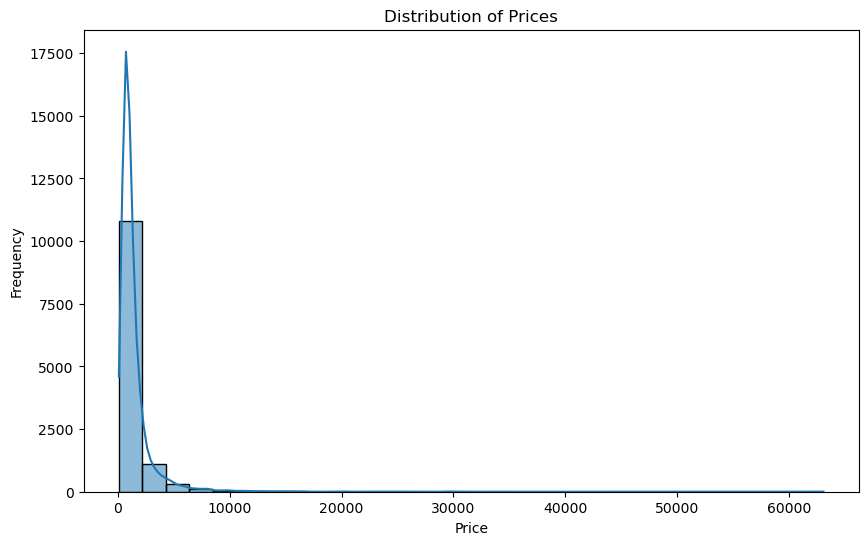

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'].dropna(), bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

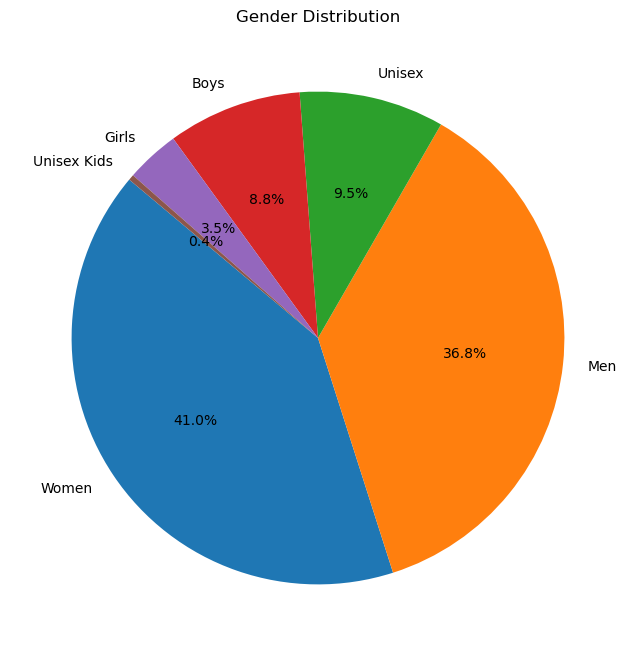

In [14]:
# Example: Pie chart of gender distribution
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

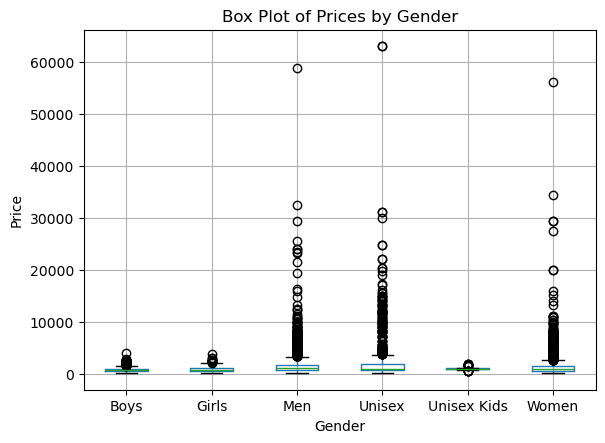

In [15]:
df.boxplot(column='price', by='gender')
plt.xlabel('Gender')
plt.ylabel('Price')
plt.title('Box Plot of Prices by Gender')
plt.suptitle('')  # Suppress the default title to avoid duplication
plt.show()


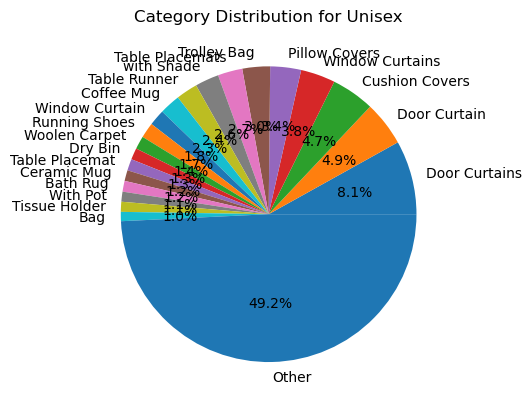

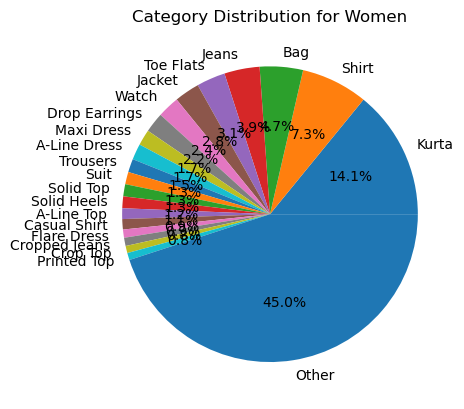

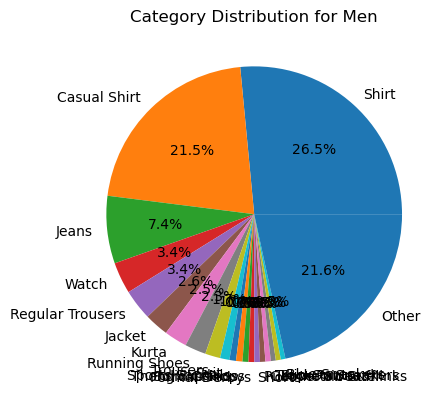

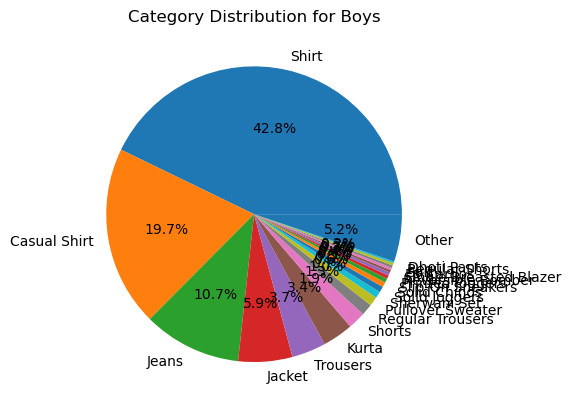

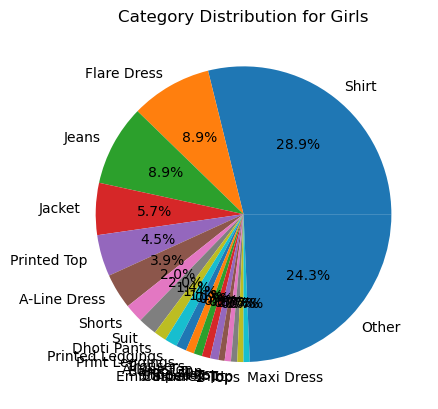

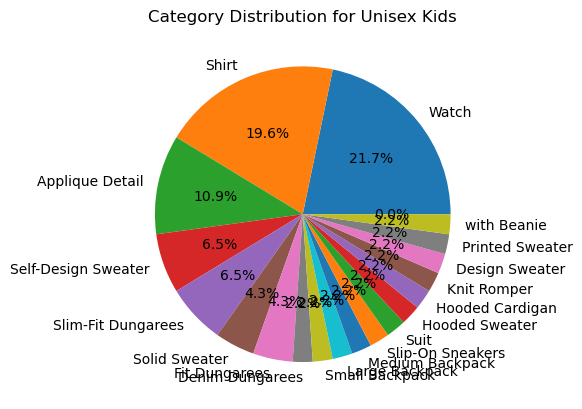

In [16]:
import matplotlib.pyplot as plt

# Loop through each unique gender
for gender in df['gender'].unique():
    plt.figure()
    
    # Get the value counts for the categories of the current gender
    category_counts = df[df['gender'] == gender]['category'].value_counts()
    
    # Get the top 20 categories
    top_20_categories = category_counts.head(20)
    
    # Aggregate the counts for categories outside the top 20 into an "Other" category
    other_count = category_counts[20:].sum()
    top_20_categories['Other'] = other_count
    
    # Plot the pie chart
    top_20_categories.plot(kind='pie', autopct='%1.1f%%', title=f'Category Distribution for {gender}')
    plt.ylabel('')  # Hide the y-label
    plt.show()


In [17]:
# Apply str.isalnum() to 'category' column and count True values
alphanumeric_count = df['category'].astype(str).str.isalnum().sum()

# Print the total count
print("Total count of alphanumeric entries:", alphanumeric_count)

Total count of alphanumeric entries: 5080


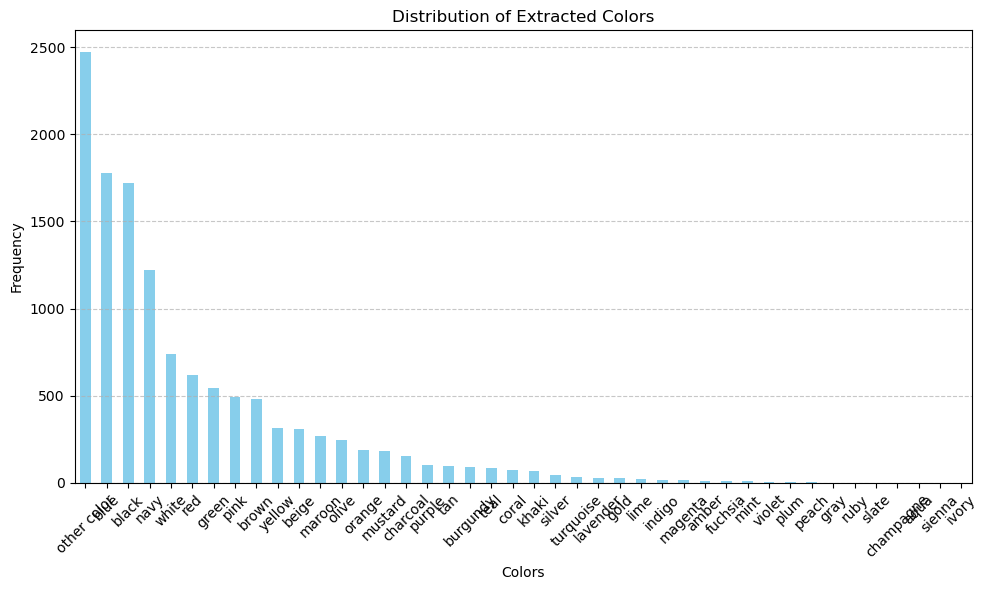

In [18]:
# Assuming 'extracted_color' column exists in your dataset
extracted_colors = df['extracted_color']

# Count frequency of each color
color_counts = extracted_colors.value_counts()

# Plotting
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Extracted Colors')
plt.xlabel('Colors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [19]:
# Get unique brands
unique_brands = df['brand'].unique()
print("Unique brands:", unique_brands)

# Get counts of each brand
brand_counts = df['brand'].value_counts()
print("Brand counts:\n", brand_counts)

Unique brands: ['DKNY' 'EthnoVogue' 'SPYKAR' 'Raymond' 'Parx' 'SHOWOFF' 'Kenneth Cole'
 'Police' 'Vishudh' 'Being Human' 'Homesake' 'SEJ by Nisha Gupta'
 'YAK YAK' 'PARFAIT' 'Michael Kors' 'HIGHLANDER' 'JEWEL JUNCTION' 'ID'
 'Story@home' 'Gini and Jony' 'Sera' 'AccessHer' 'Alcis'
 'Difference of Opinion' 'Tokyo Talkies' 'ANNA SUI' 'her by invictus'
 'Soie' 'Lara Karen' 'Urban Dog' 'ahilya' 'VASTRAMAY' 'Campus Sutra'
 'FIDO DIDO' 'MIAH Decor' 'BuckleUp' 'Peter England' 'AIGNER' 'Lady Lyka'
 'Park Avenue' 'Roadster' 'U.S. Polo Assn. Denim Co.' 'Sweet Dreams'
 'Kazo' 'Stylo Bug' 'Bvlgari' 'Qraa Men' 'GAS' 'WITH' 'ZUSH'
 'JBN Creation' 'U.S. Polo Assn. Kids' 'DressBerry' 'ColorPlus' 'Lakme'
 'Allen Solly Woman' 'Palm Tree' 'Arrow' 'DAVID BECKHAM' 'MANGO' 'Carrera'
 'ROMEE' 'TAYHAA' 'Ishin' 'Shoe Couture' 'HARBORNBAY' 'Keds' 'Rozia'
 'Aj DEZInES' 'Monte Carlo' 'even' 'ether' 'Crimsoune Club'
 'Russell Athletic' 'MIMOSA' 'Puma' 'Blackberrys' 'Playdate' 'Rocia'
 'Marvel by Wear Your Mind' 'An

In [20]:
# Define a list of common categories based on the common words
categories = [
    'shirt', 'jeans', 'kurta', 'dress', 'trousers', 't-shirt', 'polo', 'top', 'jacket',
    'suit', 'blazer', 'shorts', 'skirt', 'sweater', 'hoodie', 'leggings', 'saree', 'lehenga',
    'shoes', 'boots', 'sandals', 'sneakers', 'heels', 'flats', 'bag', 'belt', 'hat', 'scarf'
]

# Function to extract the first matching category from the name
def extract_category(name):
    name_lower = name.lower()
    for category in categories:
        if category in name_lower:
            return category
    return 'unknown'

# Apply the function to the 'name' column
df['category'] = df['name'].apply(extract_category)

# Display the distribution of categories
category_counts = df['category'].value_counts()
category_counts


category
shirt       3463
unknown     3437
kurta        892
jeans        775
top          581
dress        468
trousers     377
sneakers     376
bag          285
jacket       273
shoes        230
flats        187
sweater      148
sandals      146
saree        145
suit         140
polo         131
heels        113
shorts        87
blazer        79
skirt         40
leggings      36
belt          34
lehenga       13
hoodie        11
scarf         10
hat            9
boots          5
Name: count, dtype: int64

Top 20 brands:
 brand
Indian Terrain          971
Puma                    345
Pepe Jeans              340
AURELIA                 307
Flying Machine          301
W                       261
U.S. Polo Assn. Kids    234
Roadster                232
GAP                     216
WROGN                   175
Park Avenue             173
HERE&NOW                164
Parx                    154
Cortina                 134
Calvin Klein Jeans      131
Lavie                   121
Next Look               107
Titan                   107
DressBerry              106
SEJ by Nisha Gupta      103
Name: count, dtype: int64


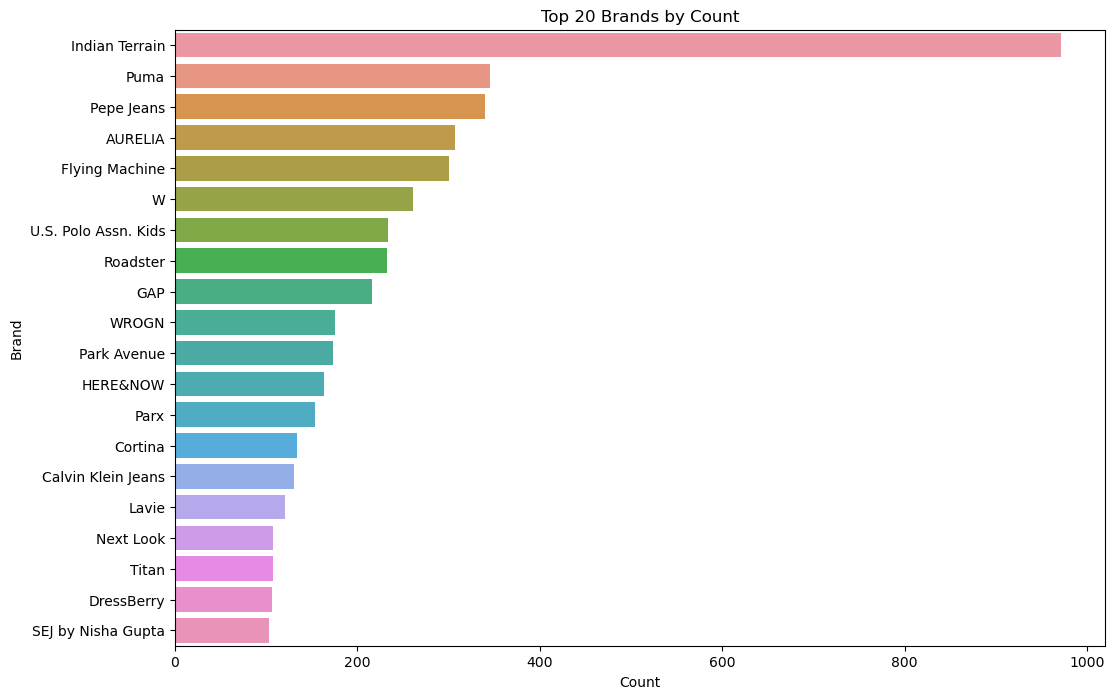

In [21]:

# Get counts of each brand
brand_counts = df['brand'].value_counts()

# Get the top 20 brands
top_20_brands = brand_counts.nlargest(20)
print("Top 20 brands:\n", top_20_brands)

# Plotting the top 20 brands
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_brands.values, y=top_20_brands.index)
plt.title('Top 20 Brands by Count')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

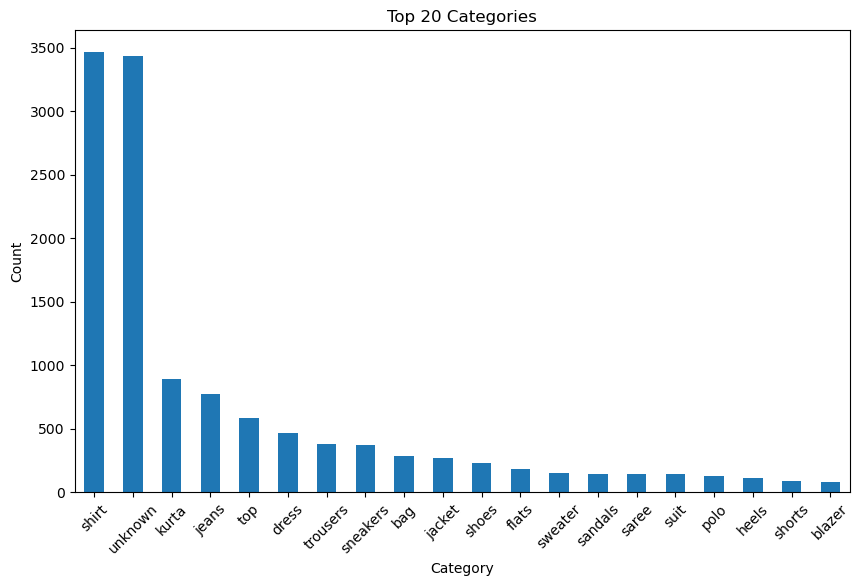

In [22]:
# Get the top 20 categories
top_20_categories = category_counts.head(20)

# Plot the top 10 categories
plt.figure(figsize=(10, 6))
top_20_categories.plot(kind='bar')
plt.title('Top 20 Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [23]:
gender_encoded = pd.get_dummies(df['gender'], prefix='gender', dtype=int)
print(gender_encoded)


       gender_Boys  gender_Girls  gender_Men  gender_Unisex  \
0                0             0           0              1   
1                0             0           0              0   
2                0             0           0              0   
3                0             0           1              0   
4                0             0           1              0   
...            ...           ...         ...            ...   
12486            0             0           1              0   
12487            0             0           0              0   
12488            0             1           0              0   
12489            0             0           1              0   
12490            0             0           1              0   

       gender_Unisex Kids  gender_Women  
0                       0             0  
1                       0             1  
2                       0             1  
3                       0             0  
4                       0        

In [24]:
extracted_color_encoded = pd.get_dummies(df['extracted_color'], prefix='extracted_color', dtype=int)
print(extracted_color_encoded)


       extracted_color_amber  extracted_color_aqua  extracted_color_beige  \
0                          0                     0                      0   
1                          0                     0                      1   
2                          0                     0                      0   
3                          0                     0                      0   
4                          0                     0                      0   
...                      ...                   ...                    ...   
12486                      0                     0                      0   
12487                      0                     0                      0   
12488                      0                     0                      0   
12489                      0                     0                      0   
12490                      0                     0                      0   

       extracted_color_black  extracted_color_blue  extracted_color_brown  

In [25]:
# Create the LabelEncoder instance
le = LabelEncoder()

# Fit the label encoder and transform the 'category' column
df['category_encoded'] = le.fit_transform(df['category'])
print("Original DataFrame:")
print(df)

# To decode the labels back to the original categories
df['category_decoded'] = le.inverse_transform(df['category_encoded'])
print("\nDataFrame with decoded labels:")
print(df)

Original DataFrame:
                                                    name       mpn  price  \
0      DKNY Unisex Black & Grey Printed Medium Trolle...  10017413  11745   
1      EthnoVogue Women Beige & Grey Made to Measure ...  10016283   5810   
2      SPYKAR Women Pink Alexa Super Skinny Fit High-...  10009781    899   
3      Raymond Men Blue Self-Design Single-Breasted B...  10015921   5599   
4      Parx Men Brown & Off-White Slim Fit Printed Ca...  10017833    759   
...                                                  ...       ...    ...   
12486  Pepe Jeans Men Black Hammock Slim Fit Low-Rise...  10262843   1299   
12487                 Mochi Women Gold-Toned Solid Heels  10261721   1990   
12488  612 league Girls Navy Blue & White Printed Reg...  10261607    602   
12489  Bvlgari Men Aqva Pour Homme Marine Eau de Toil...  10266621   8950   
12490  Pepe Jeans Men Black & Grey Striped Polo Colla...  10265199    799   

       in_stock       brand  \
0          True        D

In [26]:
df

,name,mpn,price,in_stock,brand,description,images,gender,extracted_color,category,category_encoded,category_decoded
0,DKNY Unisex Black & Grey Printed Medium Trolle...,10017413,11745,True,DKNY,"Black and grey printed medium trolley bag, sec...",http://assets.myntassets.com/assets/images/100...,Unisex,black,bag,0,bag
1,EthnoVogue Women Beige & Grey Made to Measure ...,10016283,5810,True,EthnoVogue,Beige & Grey made to measure kurta with churid...,http://assets.myntassets.com/assets/images/100...,Women,beige,kurta,11,kurta
2,SPYKAR Women Pink Alexa Super Skinny Fit High-...,10009781,899,True,SPYKAR,Pink coloured wash 5-pocket high-rise cropped ...,http://assets.myntassets.com/assets/images/100...,Women,pink,jeans,10,jeans
3,Raymond Men Blue Self-Design Single-Breasted B...,10015921,5599,True,Raymond,Blue self-design bandhgala suitBlue self-desig...,http://assets.myntassets.com/assets/images/pro...,Men,blue,suit,23,suit
4,Parx Men Brown & Off-White Slim Fit Printed Ca...,10017833,759,True,Parx,"Brown and off-white printed casual shirt, has ...",http://assets.myntassets.com/assets/images/pro...,Men,brown,shirt,18,shirt
...,...,...,...,...,...,...,...,...,...,...,...,...
12486,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,10262843,1299,True,Pepe Jeans,"Black dark wash 5-pocket low-rise jeans, clean...",http://assets.myntassets.com/assets/images/102...,Men,black,jeans,10,jeans
12487,Mochi Women Gold-Toned Solid Heels,10261721,1990,True,Mochi,"A pair of gold-toned open toe heels, has regul...",http://assets.myntassets.com/assets/images/pro...,Women,other color,heels,7,heels
12488,612 league Girls Navy Blue & White Printed Reg...,10261607,602,True,612 league,Navy Blue and White printed mid-rise denim sho...,http://assets.myntassets.com/assets/images/102...,Girls,navy,shorts,20,shorts
12489,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,10266621,8950,True,Bvlgari,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,http://assets.myntassets.com/assets/images/102...,Men,other color,unknown,27,unknown
